In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

#### <h1 style="text-align:center">Clase: Análisis de vibraciones en sistemas no forzados con MDOF. El uso de valores y vectores propios </h1>
<h3 style="text-align:center">ACUS125: Aislamiento y Análisis de Vibraciones</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS125-Aislamiento-y-Analisis-de-Vibraciones">https://github.com/vpobleteacustica/ACUS125-Aislamiento-y-Analisis-de-Vibraciones</a><br> 
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

In [2]:
%matplotlib notebook
from IPython.display import YouTubeVideo
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from resonance.linear_systems import FourStoryBuildingSystem

In [3]:
def push_floor(amplitude, frequency, time):
    return 0, 0, 0, amplitude * np.sin(frequency * time)

### Al cambiar de un sistema de un grado de libertad a uno de dos o más grados de libertad:
> + Aparecen dos conceptos muy importantes:
>> 1. Frecuencias naturales.
>> 2. Modos de vibración.
> + Un respositorio creado por los autores Jason K. Moore, (Faculty, Mechanical and Aerospace Engineering Department, University of California), y Davis
Kenneth Lyons, (Graduate Student, Mechanical and Aerospace Engineering Department, University of California, Davis), y publicado en el año 2020, sirve para aprender vibraciones mecánicas y visualizar los modos de vibrar: https://github-dotcom.gateway.web.tr/moorepants/resonance

In [ ]:
YouTubeVideo('hSwjkG3nv1c', width=600)

In [4]:
# Modes of a Vibrating Building
np.set_printoptions(precision = 5, linewidth = 100, suppress=True)

# Simulate the four story building.
sys          = FourStoryBuildingSystem()
sys.constants
sys.coordinates

{'x1': 0.001, 'x2': 0.01, 'x3': 0.02, 'x4': 0.025}

<IPython.core.display.Javascript object>


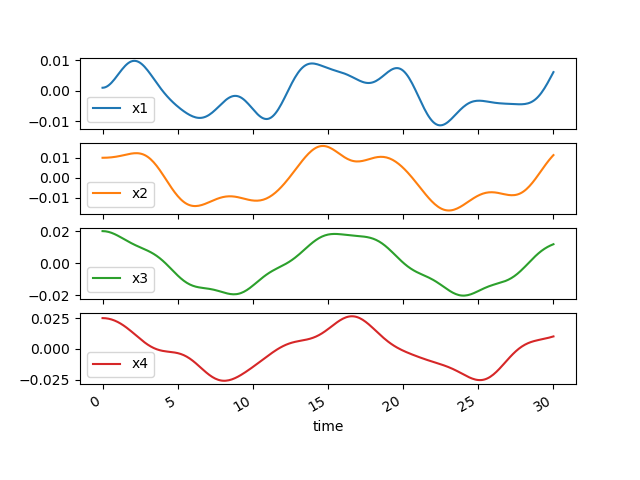

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9be8c0ca0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fd9be0a6a30>], dtype=object)

In [5]:
traj = sys.free_response(30, sample_rate=10)
traj[list(sys.coordinates.keys())].plot(subplots=True)


In [ ]:
#traj.plot(subplots=True)

<IPython.core.display.Javascript object>


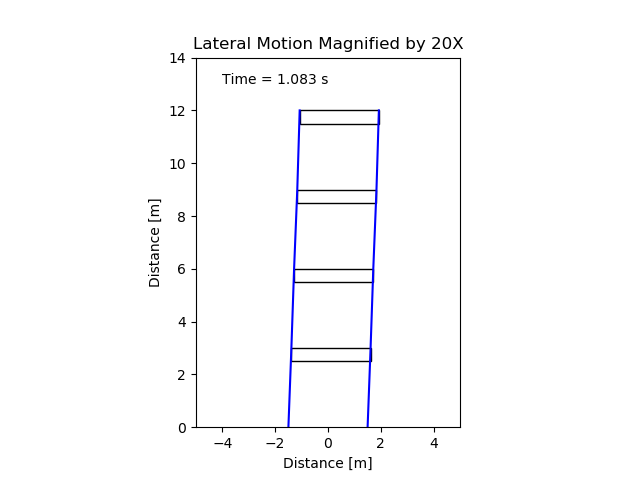

In [6]:
sys.animate_configuration(fps=12)

### Por qué usar valores y vectores propios para analizar vibraciones?
> + Porque nos simplifican la tarea de análisis de vibraciones y nos ofrecen información importante sobre cómo visualizar e interpretar el comportamiento dinámico del sistema.

### Planteamiento matemático:
> + La siguiente ecuación representa el planteamiento matemático del problema de los valores y vectores propios, donde $A$ es una **matriz** de $n\times n$; $v$ es un **vector** de $n\times 1$ distinto de cero y $\lambda$ es un **escalar** (que puede ser real o complejo):

$$
\begin{align}
\large A\cdot v &= \large \lambda \cdot v
\end{align}
$$

> + Un **valor** cualquiera de $\lambda$ para el que esta ecuación tenga una solución, se conoce como un **valor propio de la matriz** $A$.
> + El **vector**, $v$, que corresponde a este **valor**, se llama **valor propio**.
> + El planteamiento matemático se puede re-escribir como:

$$
\begin{align*}
\large A\cdot v - \underbrace{\large \lambda \cdot v} &= \large 0 \\
\large A\cdot v - \large \lambda \cdot\mathbb{1}\cdot v &= \large 0
\end{align*}
$$
$$
\begin{align}
\large (A - \large \lambda \cdot\mathbb{1})\cdot v &= \large 0
\end{align}
$$

> + Si $v$ es distinto de cero, esta ecuación sólo tendrá solución si:

$$
\begin{align}
\begin{vmatrix}
\large A - \large \lambda \cdot\mathbb{1}
\end{vmatrix}
=\large 0
\end{align}
$$

> + Esta ecuación se llama **ecuación característica** de $A$, y es un polinomio de orden $n$-ésimo en $\lambda$ con $n$ raíces. 
> + Estas raíces se denominan **valores propios** de $A$. 
> + Para cada **valor propio** habrá un **vector propio** para el cual la ecuación del valor propio es verdadera.

### Calculemos los valores y vectores propios de la matriz:
$$
\begin{align}
\large A =
\begin{vmatrix}
\large 1 & \large 2 & \large 3\\
\large 3 & \large 2 & \large 1\\
\large 1 & \large 0 & \large -1\\
\end{vmatrix}
\end{align}
$$

> + Usemos la función **numpy.linalg.eig** nos retorna una tupla que consta de un **vector** y un **arreglo** (matriz). 
> + El vector **(aquí w)** contiene los **valores propios**. 
> + El arreglo **(aquí v)** contiene los correspondientes **vectores propios**, con un vector propio por cada columna. 
> + Los vectores propios se **normalizan**, dividiendo cada componente por la **norma** del vector, por lo que sus normas euclidianas son 1.


In [65]:
A = np.array([[1.0, 2.0, 3.0], [3.0, 2.0, 1.0], [1.0, 0.0, -1.0]])
A

array([[ 1.,  2.,  3.],
       [ 3.,  2.,  1.],
       [ 1.,  0., -1.]])

In [71]:
w, v = LA.eig(A)
print('los valores propios son: ')
print(w)
print('\n')
print('los vectores propios son: ')
print(v)

los valores propios son: 
[ 4.31662 -2.31662  0.     ]


los vectores propios son: 
[[ 0.58428  0.73596  0.40825]
 [ 0.80408 -0.38199 -0.8165 ]
 [ 0.1099  -0.55897  0.40825]]


> + El valor propio $\text{w}[0]$ va con la columna $0-$ésima de $\text{v}$. 
> + El valor propio $\text{w}[1]$ va con la columna 1 de $\text{v}$, etc. 
> + Para extraer el vector columna $i-$ésimo, usamos: $\text{u} = \text{v}[:,i]$

In [72]:
print(v[:,2])

[ 0.40825 -0.8165   0.40825]


> + Sólo para tener claridad sobre lo que está sucediendo aquí, verifiquemos la condición de valor y vector propio, para el segundo valor propio y vector propio: $$
\begin{align*}
\large A\cdot v &= \large \lambda \cdot v
\end{align*}
$$

In [75]:
# vector propio: columna 1
u = v[:,1]
print(u)

[ 0.73596 -0.38199 -0.55897]


In [76]:
# valor propio dos
lambda_2 = w[1]
print(lambda_2)

-2.3166247903554


In [77]:
# multiplicamos la matriz por el vector propio:
print(np.dot(A,u))

[-1.70494  0.88492  1.29493]


In [78]:
# multiplicamos el valor propio por el vector propio:
print(lambda_2*u)

[-1.70494  0.88492  1.29493]


### Vamos ahora a resolver el problema a mano:

In [ ]:
# Resolución a mano

### Resolver el siguiente problema de vibración usando el análisis de valores y vectores propios:

> + El sistema consiste de 2 masas y 3 resortes. Las masas están obligadas a moverse sólo en dirección horizontal, no se pueden mover hacia arriba ni hacia abajo:
<p style="text-align:center">
	<img src="ex1.png" alt="MDOFCT" width=40%/></a><br>
    <strong> Figura 1: Vibración libre, configuraciones naturales de desplazamiento.</strong>
</p>

> + Pleateamos las ecuaciones de movimiento: